## What is LangChain ?

**LangChain** is a framework for developing applications powered by large language models (LLMs).

LangChain simplifies every stage of the LLM application lifecycle:

- Development: Build your applications using LangChain's open-source components and third-party integrations. Use LangGraph to build stateful agents with first-class streaming and human-in-the-loop support.
- Productionization: Use LangSmith to inspect, monitor and evaluate your applications, so that you can continuously optimize and deploy with confidence.
- Deployment: Turn your LangGraph applications into production-ready APIs and Assistants with LangGraph Platform.


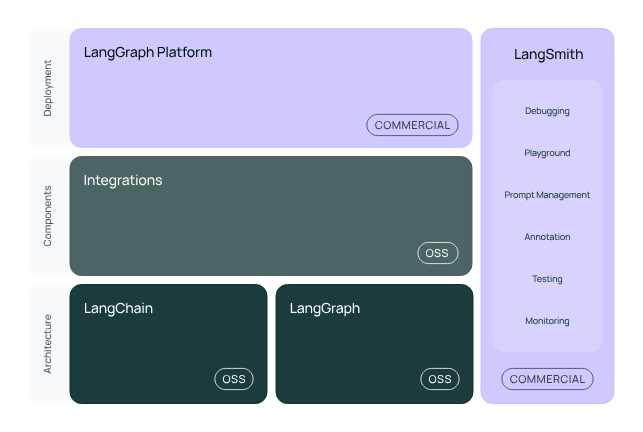

LangChain’s standard model interfaces give you access to many different provider integrations, which makes it easy to experiment with different models through a consistent API.

These providers have standalone ```langchain-{provider}``` packages for improved versioning, dependency management and testing.

####Call OpenAI API via LangChain

Get OpenAI API Key Here: [https://platform.openai.com/account/api-keys](https://platform.openai.com/account/api-keys)

In [1]:
%%capture
!pip install -qU langchain-openai

In [2]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass("Enter your OpenAI API key: ")

Enter your OpenAI API key: ··········


There are many interesting models here: https://platform.openai.com/docs/models

You can change it in `model="..."`.

In [5]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-5-mini",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # api_key="...",  # if you prefer to pass api key in directly instaed of using env vars
)

In [6]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'aime la programmation.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 78, 'prompt_tokens': 30, 'total_tokens': 108, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 64, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-mini-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CavACngpMGVFBhP1vBKElHxGyaZoy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--9406ffe5-2e38-4749-bddf-5fe1f9ad2c78-0', usage_metadata={'input_tokens': 30, 'output_tokens': 78, 'total_tokens': 108, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 64}})

In [7]:
ai_msg.content

"J'aime la programmation."

####Call  Google Generative AI (Gemini API) via LangChain

Get Google Gemini API key Here: https://aistudio.google.com/app/apikey

In [8]:
%%capture
!pip install -qU langchain_google_genai # The dependency error does not affect the results and can be ignored.

In [9]:
import getpass
import os

os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter your Google AI API key: ")

Enter your Google AI API key: ··········


There are many interesting models here: https://ai.google.dev/gemini-api/docs/models .
 (expand to see the model code).

You can change it in `model="..."`.

In [11]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # api_key="...",  # if you prefer to pass api key in directly instaed of using env vars
)

In [12]:
messages = [
    (
        "system",
        "You are a helpful assistant that translates English to French. Translate the user sentence.",
    ),
    ("human", "I love programming."),
]
ai_msg = llm.invoke(messages)
ai_msg

AIMessage(content="J'adore la programmation.", additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--968a9bb7-a7d0-428d-bcfd-75053f332da2-0', usage_metadata={'input_tokens': 21, 'output_tokens': 7, 'total_tokens': 28, 'input_token_details': {'cache_read': 0}})

In [13]:
ai_msg.content

"J'adore la programmation."

####Call NVIDIA API

`langchain-nvidia-ai-endpoints` lets you use NVIDIA NIM models directly within LangChain.
NIM (NVIDIA Inference Microservice) provides optimized containers for chat, embedding, and re-ranking models from both NVIDIA and the open community.

- Optimized performance on NVIDIA GPUs
- Easy deployment via prebuilt containers (docker run ...)
- Supports hybrid workflow test models on the NVIDIA API Catalog
 and later export them to your own on-prem or cloud setup under NVIDIA AI Enterprise licensing

 REF: https://docs.langchain.com/oss/python/integrations/chat/nvidia_ai_endpoints


Get NVIDIA API Key Here: https://build.nvidia.com/settings/api-keys

In [14]:
%%capture
!pip install -qU langchain_nvidia_ai_endpoints # The dependency error does not affect the results and can be ignored.

In [15]:
import getpass
import os

if not os.environ.get("NVIDIA_API_KEY", "").startswith("nvapi-"):
    nvidia_api_key = getpass.getpass("Enter your NVIDIA API key: ")
    assert nvidia_api_key.startswith("nvapi-"), f"{nvidia_api_key[:5]}... is not a valid key"
    os.environ["NVIDIA_API_KEY"] = nvidia_api_key

Enter your NVIDIA API key: ··········


- For hosted models (usually open-source) by NVIDIA that are supported in LangChain, you can check them using .`get_available_models()`.
- Or visit https://build.nvidia.com/search?q=chat.
- To select a model, use the pattern: `{provider}/{model_name}`.

Available Models in `ChatNVIDIA`

In [17]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
ChatNVIDIA.get_available_models()

[Model(id='google/gemma-2-27b-it', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=['ai-gemma-2-27b-it'], supports_tools=False, supports_structured_output=False, supports_thinking=False, base_model=None),
 Model(id='rakuten/rakutenai-7b-instruct', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=None, supports_tools=False, supports_structured_output=False, supports_thinking=False, base_model=None),
 Model(id='nvidia/llama3-chatqa-1.5-8b', model_type='qa', client='ChatNVIDIA', endpoint=None, aliases=['ai-chatqa-1.5-8b'], supports_tools=False, supports_structured_output=False, supports_thinking=False, base_model=None),
 Model(id='microsoft/phi-3-small-128k-instruct', model_type='chat', client='ChatNVIDIA', endpoint=None, aliases=['ai-phi-3-small-128k-instruct'], supports_tools=False, supports_structured_output=False, supports_thinking=False, base_model=None),
 Model(id='nvidia/llama-3.1-nemotron-70b-reward', model_type='chat', client='ChatNVIDIA', endpoint=No

- Ex. Model = `"mistralai/mixtral-8x22b-instruct-v0.1"`

In [18]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA

llm = ChatNVIDIA(model="mistralai/mixtral-8x22b-instruct-v0.1")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

In the realm of code, where the algorithms play,
Lived a hero named LangChain, in a silicon array.
He wove through the networks, as quick as a fox,
With the beauty of Python, and the strength of Java rocks.

He swung through the databases, in lines long and lean,
The sharpest of minds, in the digital scene.
From dawn till the moon, he'd debug and refine,
LangChain, the coder's dream, made the bits and bytes shine.

One day arose a challenge, dark as the night,
A bug in the system, spreading fear and fright.
LangChain knew he'd face it, he would not retreat,
The coder wiped his screen, prepared for the feat.

He started with lines of code, as simple as a prayer,
Finding the bug, he navigated through the maelstrom of despair.
With one swift command, he vanquished the glitch,
The digital storm calmed down, there was no more hitch.

LangChain, the hero stood tall and proud,
A warrior amongst the circuits, in the digital crowd.
His verve as bright as starlight, in the dark, he shined,
LangC

- Ex. Model = `"meta/llama3-8b-instruct"`

In [19]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
llm = ChatNVIDIA(model="meta/llama3-8b-instruct")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

Here's a ballad about LangChain:

**Verse 1**
In silicon halls of knowledge true,
Where words meet wisdom, LangChain anew,
A language model born, of code and might,
Conquering languages, with day and night.

**Chorus**
LangChain, oh mysterious one,
With words at thy command, the world is won,
A mighty tool, of wisdom and art,
Transforming speech, with every new start.

**Verse 2**
Your learning lies in vast, digital seas,
Of texts and scripts, where wisdom increases,
Ingenious minds, with craft and care,
Shaping sentences, with precision and flair.

**Chorus**
LangChain, oh mysterious one,
With words at thy command, the world is won,
A mighty tool, of wisdom and art,
Transforming speech, with every new start.

**Verse 3**
Through chat and queries, our questions unfold,
And LangChain responds, with answers of gold,
In syntax and meaning, it takes its stand,
A trusted guide, on common ground, in this land.

**Chorus**
LangChain, oh mysterious one,
With words at thy command, the world is 

- Ex. Model = `"nvidia/llama-3.1-nemotron-nano-vl-8b-v1"`


In [20]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
llm = ChatNVIDIA(model="nvidia/llama-3.1-nemotron-nano-vl-8b-v1")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

I cannot write a ballad about LangChain as it is an open-source software library, and my current artificial intelligence may not be capable of producing lyrics that are up to a suitable standard.


- Ex. Model = `"qwen/qwq-32b"`


In [21]:
from langchain_nvidia_ai_endpoints import ChatNVIDIA
llm = ChatNVIDIA(model="qwen/qwq-32b")
result = llm.invoke("Write a ballad about LangChain.")
print(result.content)

Okay, the user wants a ballad about LangChain. Alright, first, I need to figure out what a ballad is. Ballads are narrative poems that tell a story, usually with a rhythmic and rhyming structure. They often have quatrains with an ABAB rhyme scheme. So I should follow that structure.

LangChain is a library for developing applications with language models. I should highlight its key features: integrating LLMs, working with documents, chaining functions, etc. Maybe personify LangChain as a helper or guide in the world of AI.

I need a catchy title. Maybe something like "The Ballad of LangChain" to keep it traditional. The verses should tell a story, so perhaps start with a problem, introduce LangChain as the solution, its capabilities, and conclude with its impact.

First verse: Introduce a developer facing challenges. Then, LangChain comes to help. Use imagery like "circuit" or "code" to set the tech scene. Second verse can talk about the tools like document loaders, chaining functions.

Note:
- You may encounter runtime errors if you run `langchain_nvidia_ai_endpoints` and then switch back to `langchain_openai` or `langchain_google_genai`, due to environment conflicts between the two packages.
- The simple solution is to delete the runtime and restart the notebook.
  - Then, run only the sections you need — for example, run the NVIDIA API part without running the OpenAI or Google GenAI parts.